In [10]:
import warnings
warnings.filterwarnings("ignore")

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.preprocessing import StandardScaler

## 1. Importing Data

In [12]:
df = pd.read_csv("Mall_Customers.csv")
df.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [14]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## 2. Checking the outliers
 Boxplot

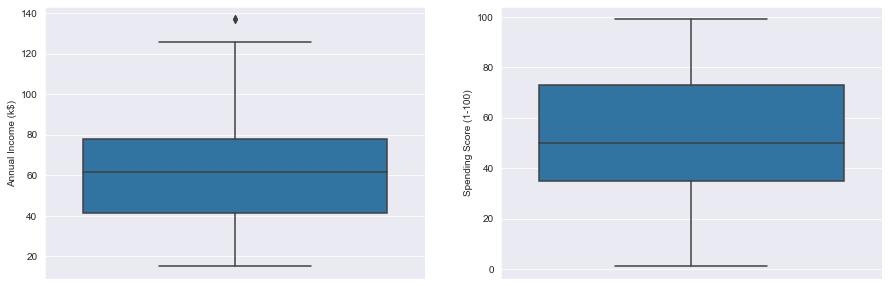

In [15]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=df, y="Annual Income (k$)")
plt.subplot(1,2,2)
sns.boxplot(data=df, y="Spending Score (1-100)")
plt.show()

## 3. Data Analysis

In [16]:
df.rename(columns={"Genre":"Gender"}, inplace=True)
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [17]:
df["Gender"].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

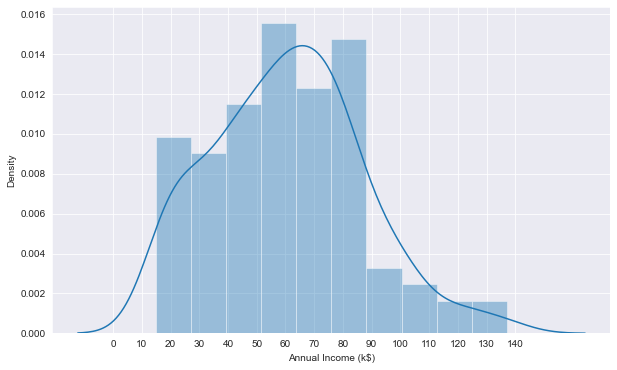

In [18]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
sns.distplot(df["Annual Income (k$)"])
plt.xticks(np.arange(0,150,10))
plt.show()

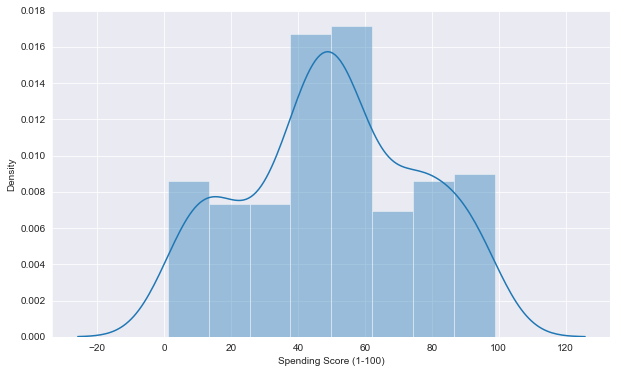

In [19]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
sns.distplot(df["Spending Score (1-100)"])
plt.show()

 ### From the baove plot, we can conclude the following observations
 1. Female customers are more in number than male customers
 2. There are more number of customers who's Spending Score ranging between 40 - 60
 3. Most of the annual income lies between 50k - 90k

### 3.1 Spending Score vs Annual Income

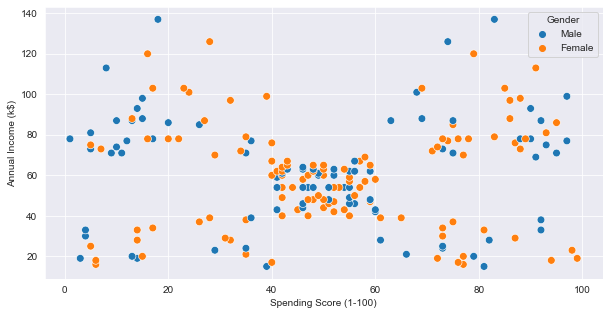

In [20]:
plt.figure(figsize=(10,5))
sns.set_style("darkgrid")
sns.scatterplot(data=df, x="Spending Score (1-100)", y="Annual Income (k$)", hue="Gender", s=60)
plt.show()

### 3.2 Age vs Number of Customer

In [21]:
df["Age"].describe()

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64

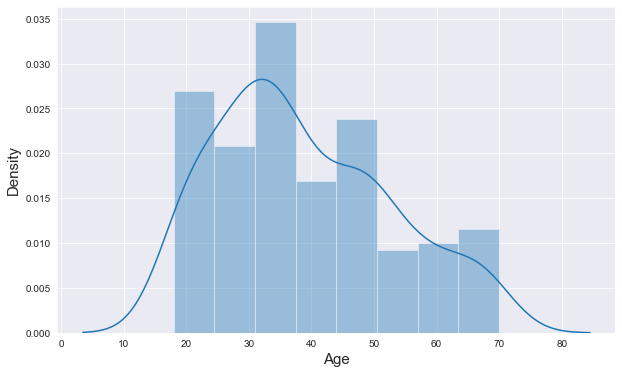

In [22]:
plt.figure(figsize=(10,6))
sns.set_style('darkgrid')
sns.distplot(df["Age"])
plt.xlabel("Age", fontsize=15)
plt.ylabel("Density", fontsize=15)
plt.show()

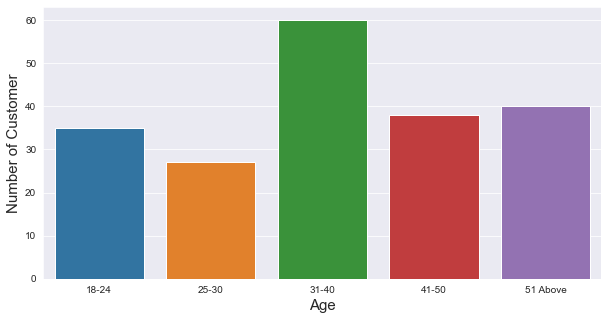

In [23]:
Age_18_24=df.Age[(df.Age>=18) & (df.Age<=24)]
Age_25_30=df.Age[(df.Age>=25) & (df.Age<=30)]
Age_31_40=df.Age[(df.Age>=31) & (df.Age<=40)]
Age_41_50=df.Age[(df.Age>=41) & (df.Age<=50)]
Age_51_Above=df.Age[(df.Age>=51)]

x=["18-24","25-30", "31-40", "41-50", "51 Above"]
y=[len(Age_18_24.values),len(Age_25_30.values),len(Age_31_40.values),len(Age_41_50.values),len(Age_51_Above.values)]
plt.figure(figsize=(10,5))
sns.barplot(x=x, y=y)
plt.xlabel("Age", fontsize=15)
plt.ylabel("Number of Customer", fontsize=15)
plt.show()

### 3.3 Spending Score vs Number of Customer

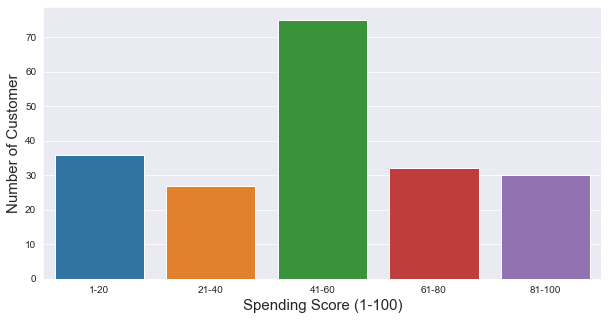

In [24]:
ss1_20 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 1) & (df["Spending Score (1-100)"] <= 20)]
ss21_40 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 21) & (df["Spending Score (1-100)"] <= 40)]
ss41_60 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 41) & (df["Spending Score (1-100)"] <= 60)]
ss61_80 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 61) & (df["Spending Score (1-100)"] <= 80)]
ss81_100 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 81) & (df["Spending Score (1-100)"] <= 100)]

score_x = ["1-20", "21-40", "41-60", "61-80", "81-100"]
score_y = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]
plt.figure(figsize=(10,5))
sns.barplot(x=score_x, y=score_y)
plt.xlabel("Spending Score (1-100)", fontsize=15)
plt.ylabel("Number of Customer", fontsize=15)
plt.show()

### 3.4 Annual Income vs Number of Customer

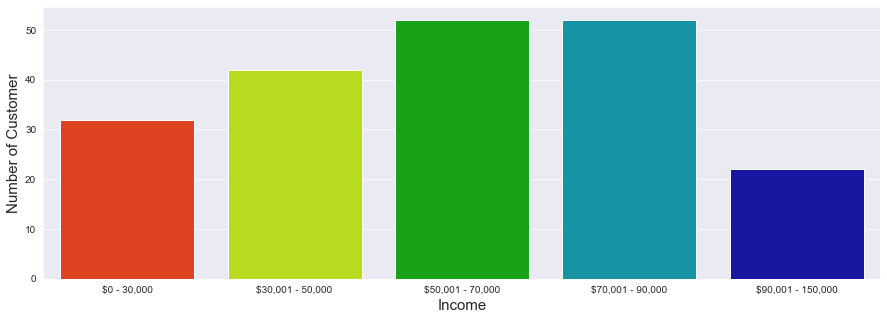

In [25]:
ai0_30 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 0) & (df["Annual Income (k$)"] <= 30)]
ai31_50 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 31) & (df["Annual Income (k$)"] <= 50)]
ai51_70 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 51) & (df["Annual Income (k$)"] <= 70)]
ai71_90 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 71) & (df["Annual Income (k$)"] <= 90)]
ai91_150 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 91) & (df["Annual Income (k$)"] <= 150)]

income_x = ["$0 - 30,000", "$30,001 - 50,000", "$50,001 - 70,000", "$70,001 - 90,000", "$90,001 - 150,000"]
income_y = [len(ai0_30.values), len(ai31_50.values), len(ai51_70.values), len(ai71_90.values), len(ai91_150.values)]
plt.figure(figsize=(15,5))
sns.barplot(x=income_x, y=income_y, palette="nipy_spectral_r")
plt.xlabel("Income", fontsize=15)
plt.ylabel("Number of Customer", fontsize=15)
plt.show()

## 4. Model Building

In [26]:
df_scaled=df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]
scaler=StandardScaler()
df_scaled_fit=scaler.fit_transform(df_scaled)

df_scaled_fit=pd.DataFrame(df_scaled_fit)
df_scaled_fit.columns=[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]
df_scaled_fit.head(5)

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


### 4.1 Elbow method 
 TO determine the optimal number of cluster(K) required to cluster the data

In [27]:
#  sum of squares
sos = []

In [28]:
a = df[["Annual Income (k$)","Spending Score (1-100)"]]

In [29]:
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, max_iter=50)
    kmeans.fit(a)
    sos.append(kmeans.inertia_)

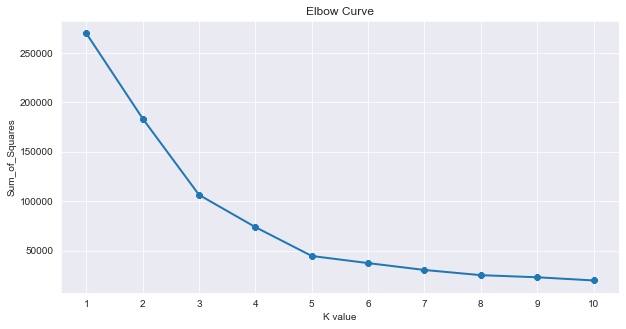

In [30]:
plt.figure(figsize=(10,5))
plt.plot(range(1,11), sos, linewidth=2, marker="8")
plt.title("Elbow Curve")
plt.xlabel("K value")
plt.ylabel("Sum_of_Squares")
plt.xticks(np.arange(1,11,1))
plt.show()

In [31]:
kmeans=KMeans(n_clusters=5, max_iter=50)
kmeans.fit(a)

KMeans(max_iter=50, n_clusters=5)

In [32]:
kmeans.labels_

array([3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0,
       3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [33]:
df["Label"]=kmeans.labels_

In [34]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Label
0,1,Male,19,15,39,3
1,2,Male,21,15,81,2
2,3,Female,20,16,6,3
3,4,Female,23,16,77,2
4,5,Female,31,17,40,3


### 4.2 Scatter plot with optimal number of clusters

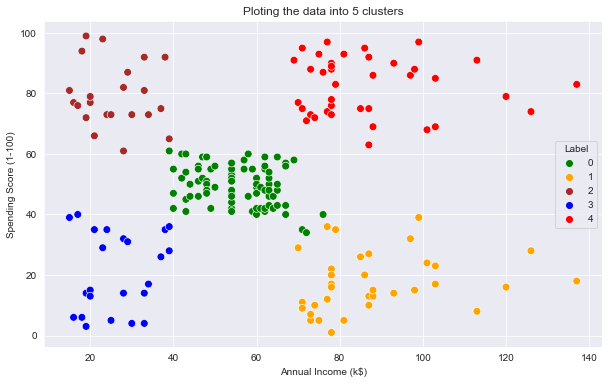

In [35]:
plt.figure(figsize=(10,6))
plt.title("Ploting the data into 5 clusters")
sns.scatterplot(data=df, x="Annual Income (k$)", y="Spending Score (1-100)", hue="Label", s=60, palette=['green','orange','brown','blue','red'])
plt.show()

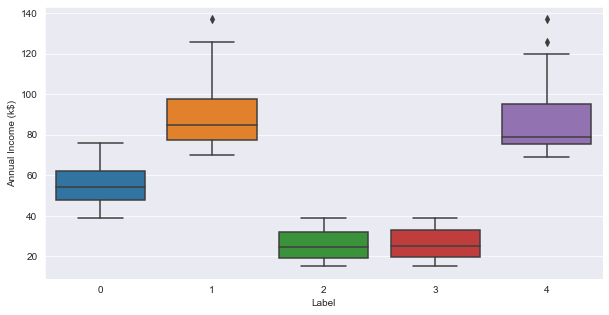

In [36]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Label", y="Annual Income (k$)", data=df)
plt.show()

### 4.3 Collecting the CustomerID

In [37]:
customer1=df[df.Label==0]
print("The number of customers in 1st group: ", len(customer1))
print("The customer ID are: ", customer1.CustomerID.values)
print("---------------------------------------------------------------------------\n")

customer2=df[df.Label==1]
print("The number of customers in 2nd group: ", len(customer2))
print("The customer ID are: ", customer2.CustomerID.values)
print("---------------------------------------------------------------------------\n")

customer3=df[df.Label==2]
print("The number of customers in 3rd group: ", len(customer3))
print("The customer ID are: ", customer3.CustomerID.values)
print("---------------------------------------------------------------------------\n")

customer4=df[df.Label==3]
print("The number of customers in 4th group: ", len(customer4))
print("The customer ID are: ", customer4.CustomerID.values)
print("---------------------------------------------------------------------------\n")

customer5=df[df.Label==4]
print("The number of customers in 5th group: ", len(customer5))
print("The customer ID are: ", customer5.CustomerID.values)
print("---------------------------------------------------------------------------\n")



The number of customers in 1st group:  81
The customer ID are:  [ 44  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 127 133 143]
---------------------------------------------------------------------------

The number of customers in 2nd group:  35
The customer ID are:  [125 129 131 135 137 139 141 145 147 149 151 153 155 157 159 161 163 165
 167 169 171 173 175 177 179 181 183 185 187 189 191 193 195 197 199]
---------------------------------------------------------------------------

The number of customers in 3rd group:  22
The customer ID are:  [ 2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 46]
---------------------------------------------------------------------------

The number of customers in 4th group